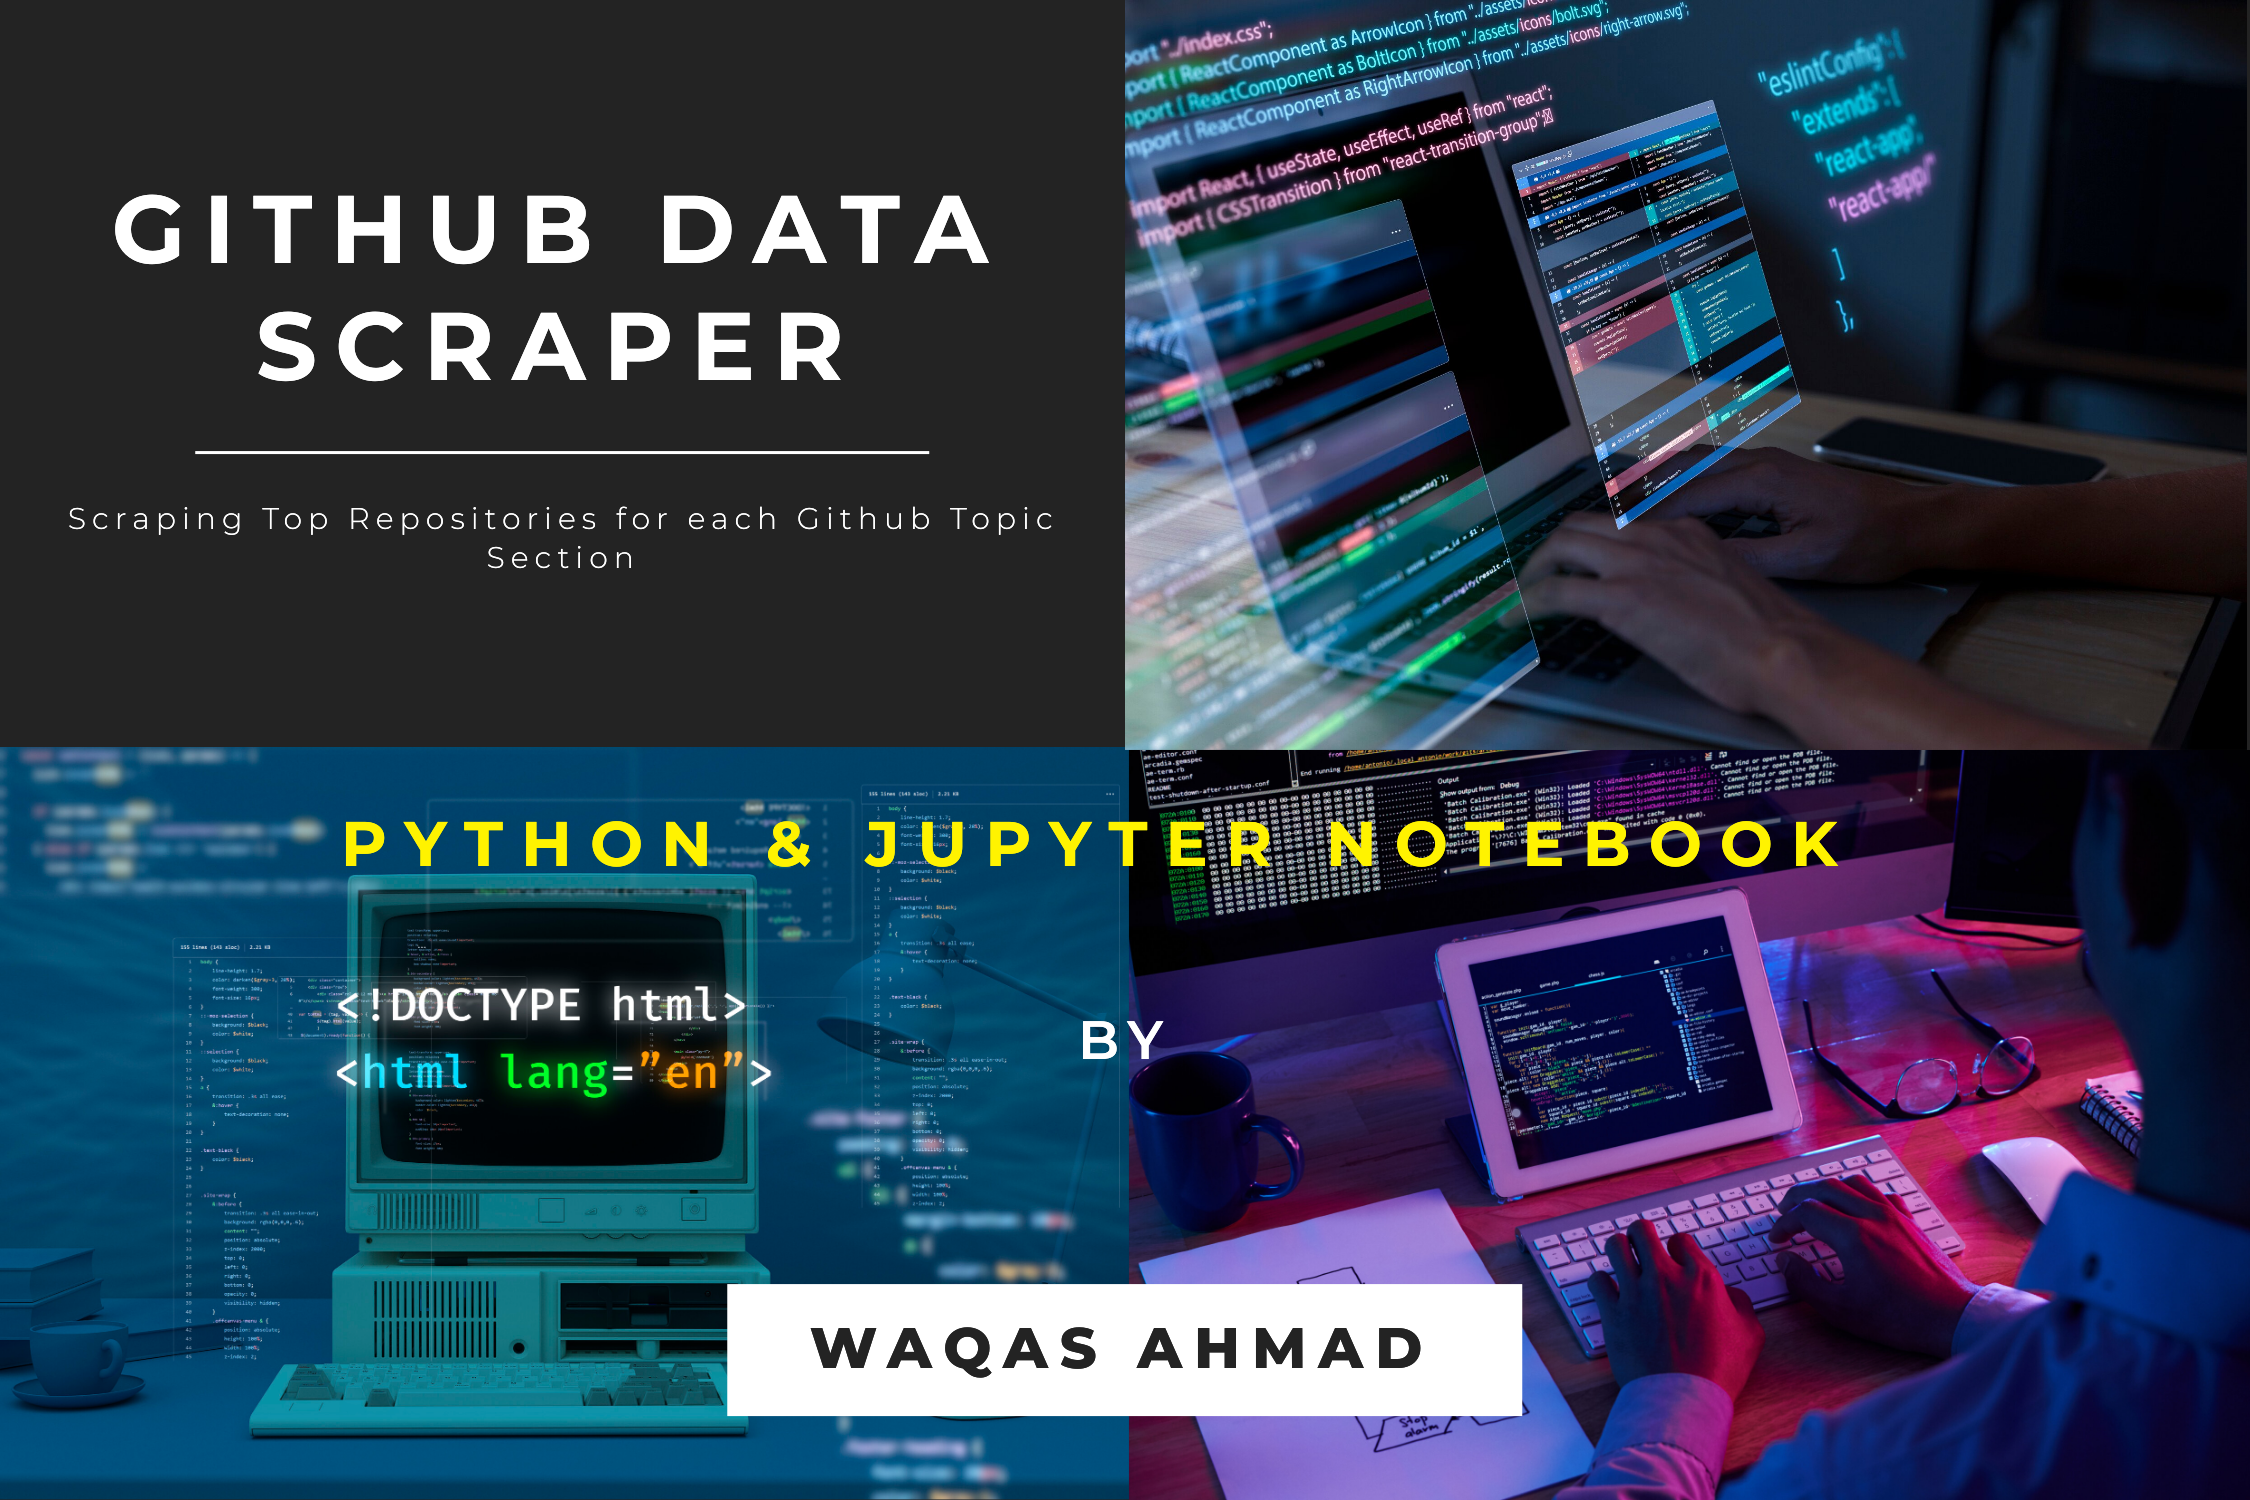

<div style='text-align: center;'>
    <h1><strong>GITHUB SCRAPER</strong></h1>
    <h4 style='text-align: center;'> To create a <i>structured dataset</i> containing repository details by scraping top repositories for GitHub Topics<i>
</div>
        <p style='text-align: right;'><i>Github scraper by waqas ahmad</i></p>


### Overview

The objective of this project is to scrape data from GitHub, a renowned platform for developers, and extract information about the top repositories within various GitHub topics. 

### Goal

Our goal is to  scrap data about the top repositories within various **GitHub Topics section**  and create a structured dataset containing repository details, such as repository name, owner username, star count, and repository URL etc

*This project serves as an exploration of web scraping techniques and data extraction from dynamic web pages*

## Project Stack
- **Programming Language:** Python
- **Libraries:** requests, Beautiful Soup, Pandas
- **Development Environment:** Jupyter Notebook

## Project Outline
### 1. Picking a Website and Defining the Objective
- **Objective:** Select a website and define the project's objective.
- **Steps:**
   - I browsed through different sites and picked Github
   - Lets identify the information to be scraped from the site.
   - Decide the format of the output CSV file.

### 2. Identifying Information to Scrape
- **Objective:** Identify the key information to extract.
- **Information to Scrape:**
   - Topic Title
   - Topic Page URL
   - Topic Description
   - Repository Name
   - Owner Username
   - Star Count
   - Repository URL
- **CSV Format:** Define the format for the output CSV file.

### 3. Strategy and Project Summary
- **Objective:** Outline the project strategy and summary.
- **Steps:**
   - Summarize the project idea and outline the strategy in a Jupyter notebook.
   - Clarify objectives and plan the approach effectively.

## Project Execution
### 4. Step 1: Scraping GitHub List of Topics
- **Objective:** Scrape the GitHub Topics page.
- **Steps:**
   - Begin data extraction by scraping the GitHub Topics page (https://github.com/topics).
    - Use the requests library to download web pages.
   - Utilize Beautiful Soup to parse and extract information.
   - Convert data to a Pandas dataframe.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def get_topics_page():
    """
    Retrieves and parses the GitHub Topics page.

    Returns:
    BeautifulSoup object: Parsed HTML content of the GitHub Topics page.
    """
    # URL of the GitHub Topics page
    topics_url = 'https://github.com/topics'

    # Send an HTTP GET request to the topics URL
    response = requests.get(topics_url)

    # Check if the response status code is 200 (OK)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))

    # Parse the HTML content using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')

    # Return the parsed document
    return doc


In [3]:
#invoking
doc = get_topics_page()

Let's create some helper functions to parse information from the page.


### 5. Step 2: Collecting Topic Information
- **Objective:** Collect information about GitHub topics.
- **Information Collected:**
   - Topic Title
   - Topic Page URL
   - Topic Description
   

*We can scrap title by grabing ptitle as shown in the screenshot below* 

</br>


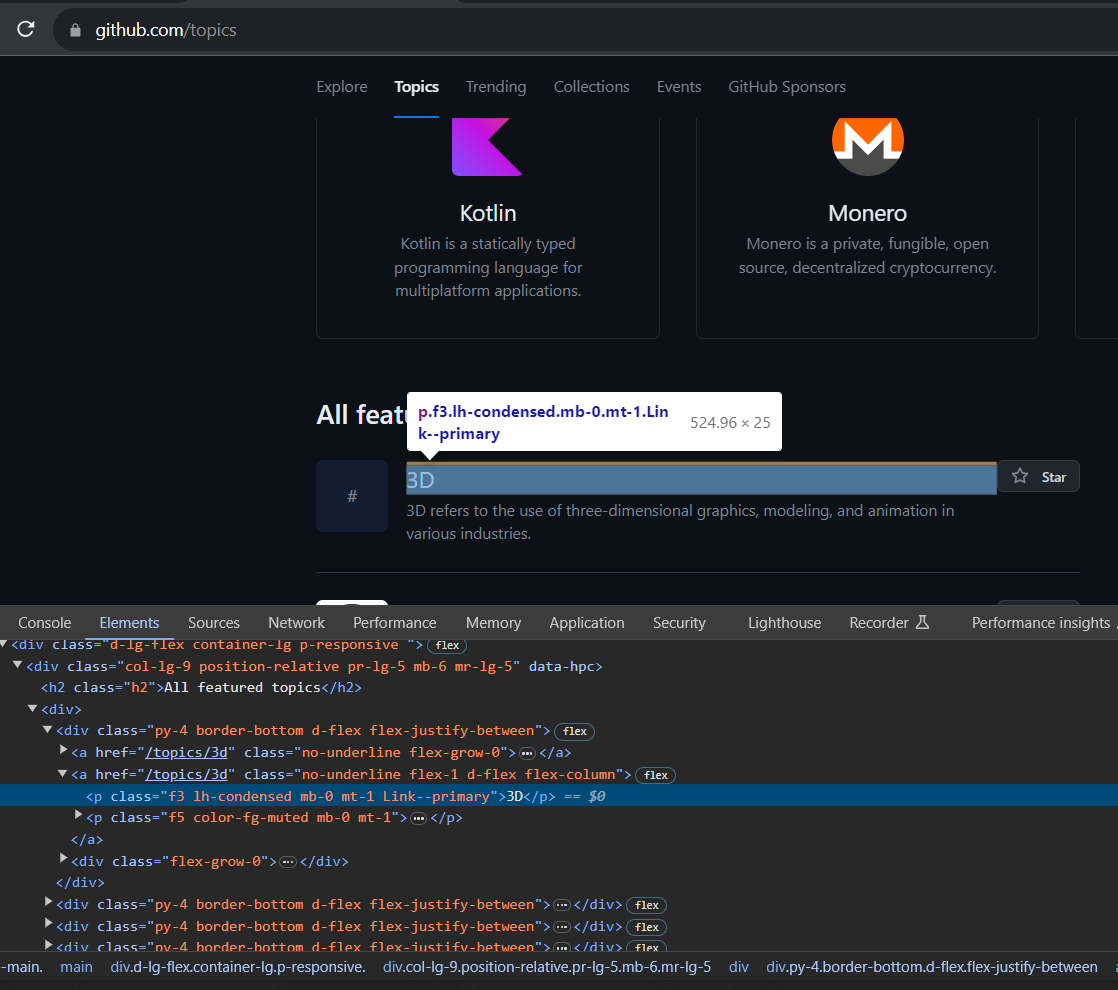

*Lets define function to scrap p titles*

In [4]:
def get_topic_titles(doc):
    """
    Extracts and returns a list of topic titles from a BeautifulSoup parsed document.

    Args:
    doc (BeautifulSoup object): Parsed HTML content of the GitHub Topics page.

    Returns:
    list of str: List of topic titles.
    """
    # Define the CSS class for topic title elements
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'

    # Find all elements with the specified class
    topic_title_tags = doc.find_all('p', {'class': selection_class})

    # Initialize an empty list to store topic titles
    topic_titles = []

    # Iterate through the found tags and extract text content
    for tag in topic_title_tags:
        topic_titles.append(tag.text)

    # Return the list of topic titles
    return topic_titles


In [5]:
titles = get_topic_titles(doc)

In [6]:
len(titles)

30

In [7]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

Similarly we have defined functions for descriptions and URLs.

Let's put this all together into a single function

*To get topic description, we can pick `p` tags with the `class` as shown...*


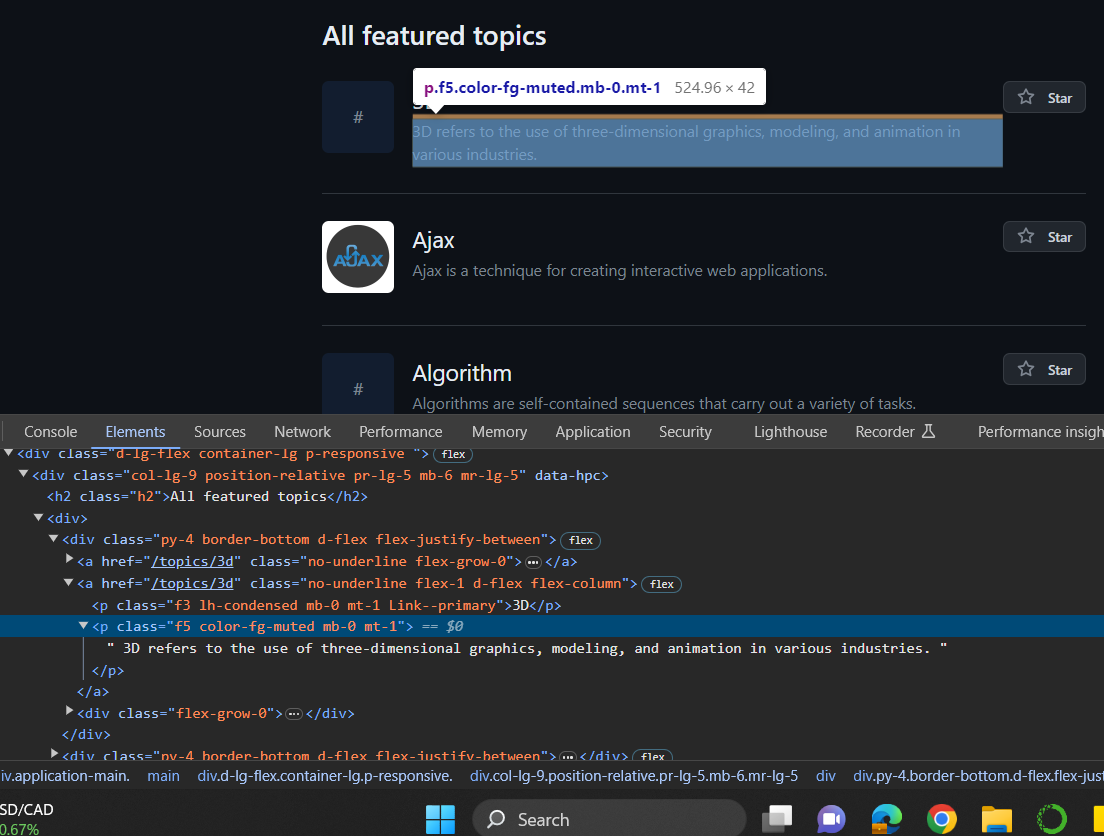

*Lets define function to scrap description*

In [8]:
def get_topic_descs(doc):
    """
    Extracts and returns a list of topic descriptions from a BeautifulSoup parsed document.

    Args:
    doc (BeautifulSoup object): Parsed HTML content of the GitHub Topics page.

    Returns:
    list of str: List of topic descriptions.
    """
    # Define the CSS class for topic description elements
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'

    # Find all elements with the specified class
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})

    # Initialize an empty list to store topic descriptions
    topic_descs = []

    # Iterate through the found tags, strip whitespace, and append to the list
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())

    # Return the list of topic descriptions
    return topic_descs


Lets grab Topics URLS

*To get topic description, we can pick `a` tags with the `class` as shown...*


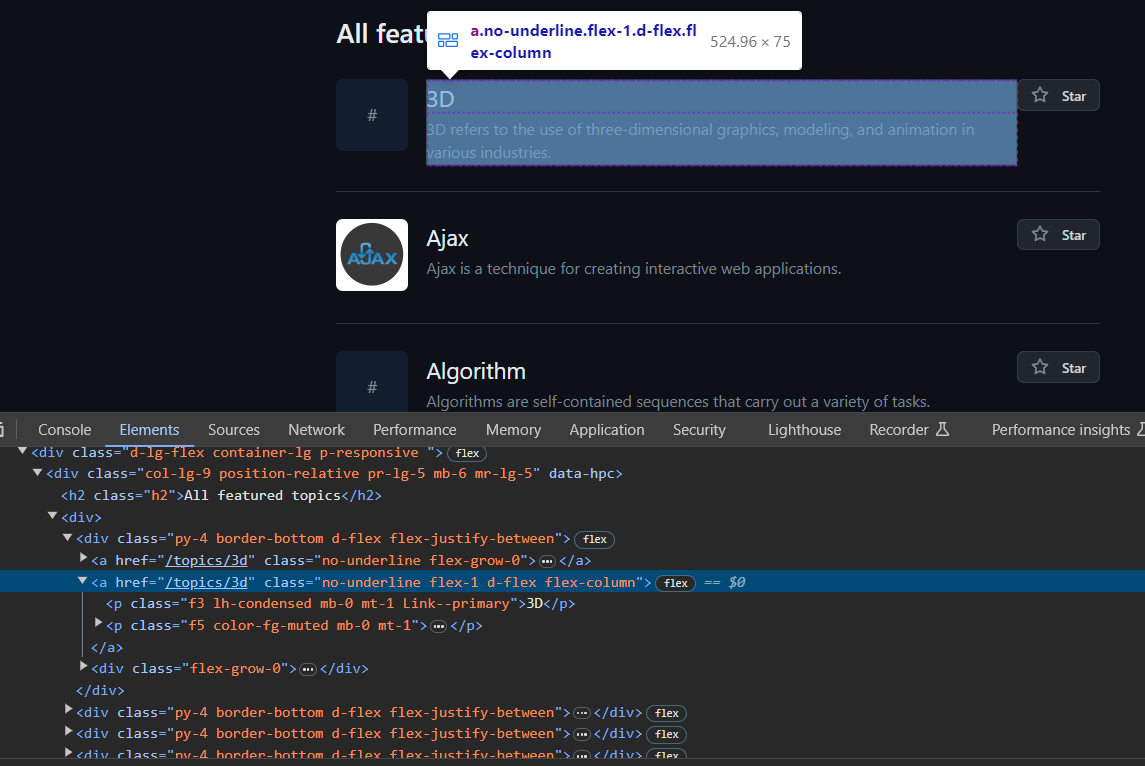

**Lets define function to scrap topic urls**

In [9]:
def get_topic_urls(doc):
    """
    Extracts and returns a list of topic page URLs from a BeautifulSoup parsed document.

    Args:
    doc (BeautifulSoup object): Parsed HTML content of the GitHub Topics page.

    Returns:
    list of str: List of topic page URLs.
    """
    # Find all 'a' tags with the specified class
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-1 d-flex flex-column'})

    # Initialize an empty list to store topic URLs
    topic_urls = []

    # Base URL for GitHub topics
    base_url = 'https://github.com'

    # Iterate through the found tags, extract 'href' attribute, and append to the list
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])

    # Return the list of topic page URLs
    return topic_urls


Lets Scrape and returns information about GitHub topics from the GitHub Topics page.

In [10]:
def scrape_topics():
    """
    Scrapes and returns information about GitHub topics from the GitHub Topics page.

    Returns:
    DataFrame: A Pandas DataFrame containing the following columns:
        - 'title': List of topic titles.
        - 'description': List of topic descriptions.
        - 'url': List of topic page URLs.
    """
    # URL of the GitHub Topics page
    topics_url = 'https://github.com/topics'

    # Send an HTTP GET request to the topics URL
    response = requests.get(topics_url)

    # Check if the response status code is 200 (OK)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topics_url))

    # Parse the HTML content using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')

    # Create a dictionary with topic information
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }

    # Convert the dictionary to a Pandas DataFrame
    return pd.DataFrame(topics_dict)


In [11]:
scrape_topics()

title                                        description  \
0                       3D  3D refers to the use of three-dimensional grap...   
1                     Ajax  Ajax is a technique for creating interactive w...   
2                Algorithm  Algorithms are self-contained sequences that c...   
3                      Amp  Amp is a non-blocking concurrency library for ...   
4                  Android  Android is an operating system built by Google...   
5                  Angular  Angular is an open source web application plat...   
6                  Ansible  Ansible is a simple and powerful automation en...   
7                      API  An API (Application Programming Interface) is ...   
8                  Arduino  Arduino is an open source platform for buildin...   
9                  ASP.NET  ASP.NET is a web framework for building modern...   
10                    Atom  Atom is a open source text editor built with w...   
11           Awesome Lists  An awesome list is a list of awesome things cu...   
12     Amazon Web Services  Amazon Web Services provides on-demand cloud c...   
13                   Azure  Azure is a cloud computing service created by ...   
14                   Babel  Babel is a compiler for writing next generatio...   
15                    Bash  Bash is a shell and command language interpret...   
16                 Bitcoin  Bitcoin is a cryptocurrency developed by Satos...   
17               Bootstrap  Bootstrap is an HTML, CSS, and JavaScript fram...   
18                     Bot  A bot is an application that runs automated ta...   
19                       C  C is a general purpose programming language th...   
20                  Chrome  Chrome is a web browser from the tech company ...   
21        Chrome extension  Chrome extensions enable users to customize th...   
22  Command line interface  A CLI, or command-line interface, is a console...   
23                 Clojure  Clojure is a dynamic, general-purpose programm...   
24            Code quality  Automate your code review with style, quality,...   
25             Code review  Ensure your code meets quality standards and s...   
26                Compiler  Compilers are software that translate higher-l...   
27  Continuous integration  Automatically build and test your code as you ...   
28                COVID-19  The coronavirus disease 2019 (COVID-19) is an ...   
29                     C++  C++ is a general purpose and object-oriented p...   

                                                 url  
0                       https://github.com/topics/3d  
1                     https://github.com/topics/ajax  
2                https://github.com/topics/algorithm  
3                    https://github.com/topics/amphp  
4                  https://github.com/topics/android  
5                  https://github.com/topics/angular  
6                  https://github.com/topics/ansible  
7                      https://github.com/topics/api  
8                  https://github.com/topics/arduino  
9                   https://github.com/topics/aspnet  
10                    https://github.com/topics/atom  
11                 https://github.com/topics/awesome  
12                     https://github.com/topics/aws  
13                   https://github.com/topics/azure  
14                   https://github.com/topics/babel  
15                    https://github.com/topics/bash  
16                 https://github.com/topics/bitcoin  
17               https://github.com/topics/bootstrap  
18                     https://github.com/topics/bot  
19                       https://github.com/topics/c  
20                  https://github.com/topics/chrome  
21        https://github.com/topics/chrome-extension  
22                     https://github.com/topics/cli  
23                 https://github.com/topics/clojure  
24            https://github.com/topics/code-quality  
25             https://github.com/topics/code-review  
26                https:

*Lets Compare it to the github topic page*

![](4.png)


Conclusion: **Verified**

Let's put this all together into a single function


### 6. Step 3: Scraping Top Repositories per Topic
- **Objective:** Scrape the top repositories within each GitHub topic.
- **Steps:**
   - Navigate to individual topic pages.
   - Scrape data on the top 25 repositories in each topic.

## Get the top 25 repositories from a topic page

TODO - explanation and step

Lets downloads and parse a GitHub topic page

In [12]:
def get_topic_page(topic_url):
    """
    Downloads and parses a GitHub topic page.

    Args:
    topic_url (str): The URL of the GitHub topic page to download and parse.

    Returns:
    BeautifulSoup object: Parsed HTML content of the GitHub topic page.
    """
    # Download the page using an HTTP GET request
    response = requests.get(topic_url)

    # Check if the response status code is 200 (OK)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))

    # Parse the HTML content using BeautifulSoup
    topic_doc = BeautifulSoup(response.text, 'html.parser')

    # Return the parsed document
    return topic_doc


In [13]:
doc = get_topic_page('https://github.com/topics/3d')


### 7. Step 4: Repository Data Extraction
- **Objective:** Extract data from repositories.
- **Information Extracted:**
   - Repository Name
   - Owner Username
   - Star Count
   - Repository URL

*Lets Parse the star count of a GitHub repository*

In [14]:
def parse_star_count(stars):
    """
    Parses the star count of a GitHub repository.

    Args:
    stars (str): The star count as a string.

    Returns:
    int: The parsed star count as an integer.
    """
    # Remove leading and trailing whitespace
    stars = stars.strip()

    # Check if the star count ends with 'k' (e.g., 5.5k)
    if stars[-1] == 'k':
        # Convert the string to a floating-point number and multiply by 1000
        return int(float(stars[:-1])*1000)

    # If not ending with 'k', parse as an integer
    return int(stars)


*Lets extracts and return information about a GitHub repository*

Lets Grab `a` tag within `h3` tag with class as mentioned in the code

![](5.png)


In [15]:
def get_repo_info(h3_tag, star_tag):
    """
    Extracts and returns information about a GitHub repository.

    Args:
    h3_tag (BeautifulSoup object): The 'h3' tag containing repository information.
    star_tag (BeautifulSoup object): The tag containing star count.

    Returns:
    tuple: A tuple containing the following information:
        - username (str): Owner's username.
        - repo_name (str): Repository name.
        - stars (int): Star count for the repository.
        - repo_url (str): URL of the GitHub repository.
    """
    # Find all 'a' tags within the 'h3' tag
    a_tags = h3_tag.find_all('a')

    # Extract username and repository name
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()

    # Construct the repository URL using the base URL
    repo_url = base_url + a_tags[1]['href']

    # Parse and extract the star count using the provided star_tag
    stars = parse_star_count(star_tag.text.strip())

    # Return the extracted information as a tuple
    return username, repo_name, stars, repo_url


</br>*Lets Extract and returns information about top repositories within a GitHub topic*

In [16]:
def get_topic_repos(topic_doc):
    """
    Extracts and returns information about top repositories within a GitHub topic.

    Args:
    topic_doc (BeautifulSoup object): Parsed HTML content of a GitHub topic page.

    Returns:
    DataFrame: A Pandas DataFrame containing information about top repositories within the topic, with columns:
        - 'username': Owner's username.
        - 'repo_name': Repository name.
        - 'stars': Star count for the repository.
        - 'repo_url': URL of the GitHub repository.
    """
    # Define the CSS class for repo title elements
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'

    # Find all 'h3' tags with the specified class
    repo_tags = topic_doc.find_all('h3', {'class': 'h3_selection_class'})

    # Find star tags
    star_tags = topic_doc.find_all('a', {'class': 'social-count float-none'})

    # Initialize a dictionary to store repo information
    topic_repos_dict = {
        'username': [],
        'repo_name': [],
        'stars': [],
        'repo_url': []
    }

    # Get repo info for each repository
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])

    # Convert the dictionary to a Pandas DataFrame
    return pd.DataFrame(topic_repos_dict)



### 8. Step 5: Creating CSV Files
- **Objective:** Create CSV files for each topic.
- **CSV Format:** CSV files include columns for repository data in the specified format.


*Lets scrapes and saves information about top repositories within a GitHub topic to a CSV file*

In [17]:
def scrape_topic(topic_url, path):
    """
    Scrapes and saves information about top repositories within a GitHub topic to a CSV file.

    Args:
    topic_url (str): The URL of the GitHub topic page to scrape.
    path (str): The path to the CSV file where the scraped data will be saved.

    Returns:
    None
    """
    # Check if the CSV file already exists at the specified path
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return

    # Get information about top repositories within the topic
    topic_df = get_topic_repos(get_topic_page(topic_url))

    # Save the scraped data to a CSV file at the specified path
    topic_df.to_csv(path, index=None)


### 9. Step 7: Putting it All Together
- **Objective:** Create functions for each project step.
- **Functions:** Functions were created to handle key steps efficiently.

In [18]:
def scrape_topics_repos():
    """
    Scrapes information about GitHub topics and their top repositories, saving the data in CSV files.

    Returns:
    None
    """
    # Print a message to indicate the start of scraping
    print('Scraping list of topics')

    # Scrape information about GitHub topics and store it in a DataFrame
    topics_df = scrape_topics()

    # Create a directory named 'data' if it doesn't exist
    os.makedirs('data', exist_ok=True)

    # Iterate through each topic and scrape top repositories
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))
        
        # Specify the path for the CSV file using the topic title
       # Scrape and save top repositories for the current topic
       

        
       


Let's run it to scrape the top repos for the all the topics on the first page of https://github.com/topics

In [19]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
Scraping top repositories for "Ajax"
Scraping top repositories for "Algorithm"
Scraping top repositories for "Amp"
Scraping top repositories for "Android"
Scraping top repositories for "Angular"
Scraping top repositories for "Ansible"
Scraping top repositories for "API"
Scraping top repositories for "Arduino"
Scraping top repositories for "ASP.NET"
Scraping top repositories for "Atom"
Scraping top repositories for "Awesome Lists"
Scraping top repositories for "Amazon Web Services"
Scraping top repositories for "Azure"
Scraping top repositories for "Babel"
Scraping top repositories for "Bash"
Scraping top repositories for "Bitcoin"
Scraping top repositories for "Bootstrap"
Scraping top repositories for "Bot"
Scraping top repositories for "C"
Scraping top repositories for "Chrome"
Scraping top repositories for "Chrome extension"
Scraping top repositories for "Command line interface"
Scraping top repositories for "Clojure"
Scrapin

We can check that the CSVs were created properly

# Output Files

- Output Files Scrapped can be seen showing the scraped data
- A CSV file is generated for each topic containing its Top 20 Repos

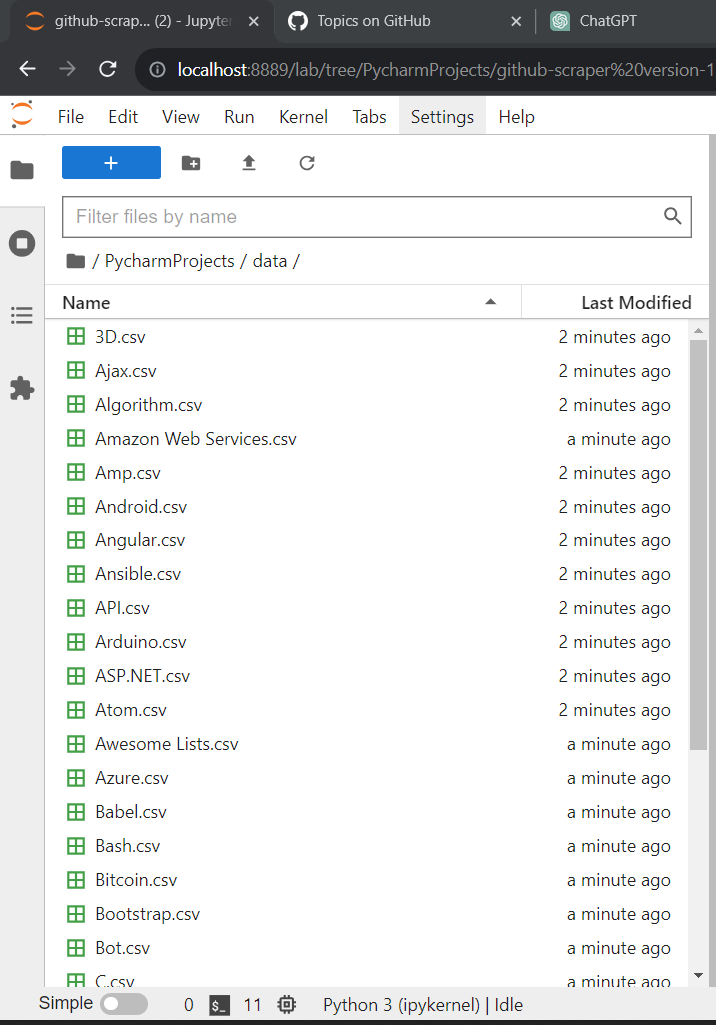

**Contenets of Top Repos for 3D**

![](excel.png)

## Conclusion
- **Successful Data Extraction:** This project demonstrated our proficiency in web scraping techniques, enabling us to successfully extract valuable data from dynamic websites.
- **Structured Datasets:** We organized the extracted information into structured datasets, providing valuable resources for developers seeking repositories in various programming domains.
- **Insights into User Engagement:** By focusing on GitHub topics and repositories, we gained insights into user engagement dynamics on the platform.
- **Portfolio Enhancement:** "Scraping Top Repositories for GitHub Topics" adds to my portfolio of data-related skills and showcases my ability to tackle real-world data extraction projects.
- **Contribution to Data Analysis:** The project contributes to the broader field of data analysis and web scraping, highlighting the practical applications of these skills.
- **Detailed Code and Implementation:** we witnessed this Jupyter Notebook, which contains the complete code and implementation.


***Thanks for being my life's audience, even when I'm just a comedy of errors!***